In [62]:
import nltk
import decimal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [63]:
# visual
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [69]:
# read the file into a list for analysis
df = pd.read_excel('reviews.xlsx', sheet_name='Restaurant_Reviews')
sen_list = []
for values in df.values:
    if not isinstance(values[0], float):
        sen_list.append(values[0])
    
sen_list

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.

In [70]:
# analyse each element of list and generate a compound value based on sentiment
compound_values = []
for sen in sen_list:
    compound_values.append(sia.polarity_scores(sen)["compound"])
 
print(compound_values)   

[0.5994, -0.3412, -0.5574, 0.6908, 0.6249, -0.6908, 0.0, 0.5719, 0.6249, 0.6249, 0.0, 0.0, 0.25, 0.0, 0.2732, -0.5423, 0.2716, 0.0, -0.3952, -0.2755, -0.1759, 0.5859, 0.4588, 0.7964, 0.0, 0.5777, 0.8074, 0.5984, -0.6249, 0.3612, 0.4199, -0.7074, 0.7391, 0.3612, 0.0, 0.4404, -0.6124, 0.636, -0.3612, 0.0, -0.5116, -0.683, 0.8271, -0.8402, 0.3612, -0.79, 0.4404, 0.3544, -0.5267, 0.4215, 0.0, 0.6166, -0.7293, 0.3802, 0.9136, -0.3657, 0.3612, 0.6369, -0.6956, -0.3182, 0.0, 0.5719, 0.4019, 0.5949, 0.7506, 0.6588, 0.5859, 0.0, 0.8481, 0.0, 0.5379, -0.0772, 0.0, -0.2382, 0.2431, -0.623, 0.807, 0.7269, -0.0056, 0.6369, 0.0516, 0.0, 0.0, -0.3818, 0.8613, -0.3612, 0.6884, -0.636, 0.7424, -0.4939, 0.8945, 0.1501, 0.7249, 0.0, 0.0, 0.0, 0.0, -0.3412, 0.4927, 0.8221, 0.7178, 0.6369, 0.8531, 0.4404, 0.5983, 0.8439, 0.6705, 0.0, 0.5399, 0.6479, 0.0, 0.8173, 0.4215, 0.4404, 0.0, 0.1007, 0.4404, -0.2382, -0.0314, 0.0, -0.7391, 0.6124, 0.8481, 0.2382, -0.6514, -0.5496, 0.0, 0.0, 0.5574, 0.0, 0.6114, 0.44

In [71]:
# create a new csv with the string + compound value
df_out = pd.DataFrame({"line": sen_list,
                      "compound_values": compound_values})
df_out.to_csv('out.csv', index=False)  

In [72]:
# print 5 highest and 5 lowest compound values
for i in range(5):
    highest_pos = sen_list[compound_values.index(max(compound_values))]
    lowest_pos = sen_list[compound_values.index(min(compound_values))]

    print(str(i) + "." + highest_pos + "/" + lowest_pos)
    compound_values.pop(compound_values.index(max(compound_values)))
    compound_values.pop(compound_values.index(min(compound_values)))

0.Great steak, great sides, great wine, amazing desserts./I hate to disagree with my fellow Yelpers, but my husband and I were so disappointed with this place.
1.Their steaks are 100% recommended!/Frozen pucks of disgust, with some of the worst people behind the register.
2.Not good for the money./I will be back many times soon.
3.I mean really, how do you get so famous for your fish and chips when it's so terrible!?!/In an interesting part of town, this place is amazing.
4.I was so insulted./They brought a fresh batch of fries and I was thinking yay something warm but no!


<Axes: xlabel='Comment', ylabel='Compound Value'>

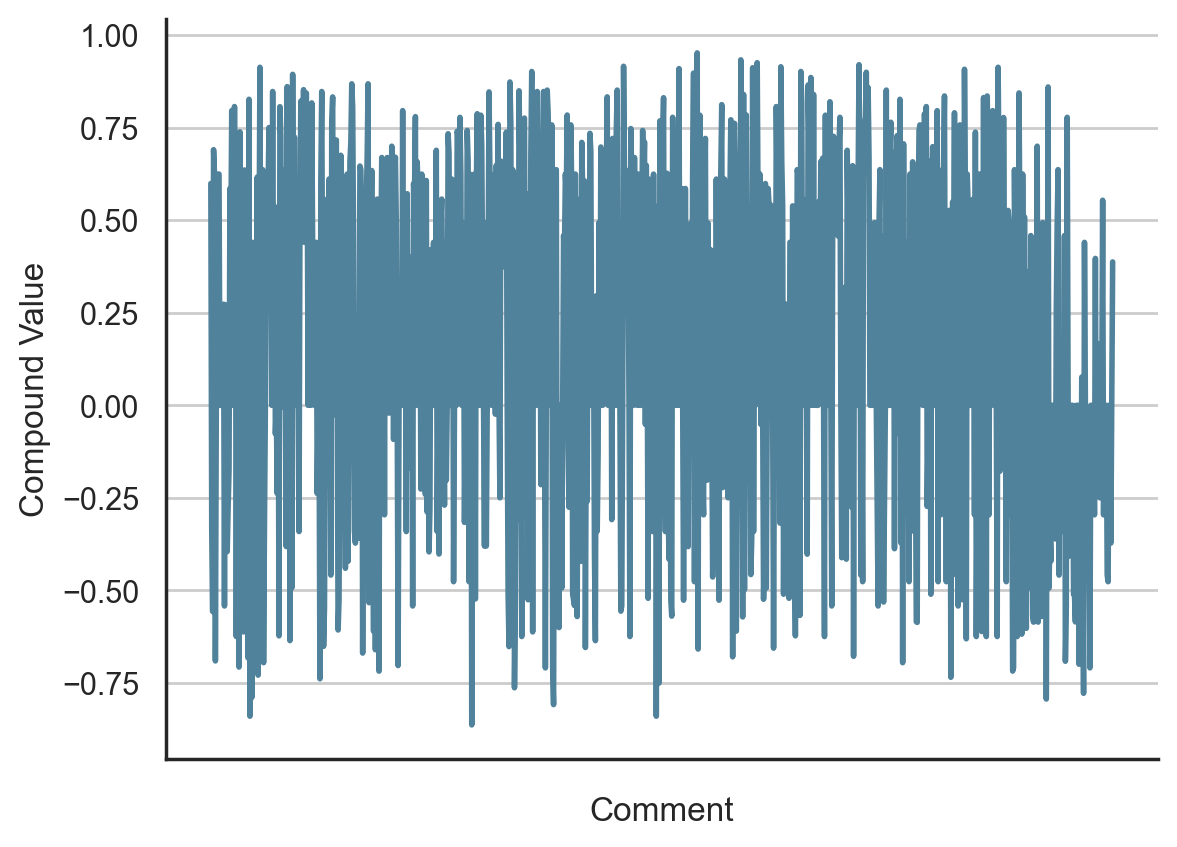

In [73]:
# create a line graph to visualize the ups and downs
line = sns.lineplot(x='line', 
                    y='compound_values', 
                    data=df_out,
                    color='#51829B',
                    linewidth=2)
line.set(xticklabels=[])
sns.despine()
sns.set_style("white")
line.grid(axis='y')
plt.xlabel('Comment')
plt.ylabel('Compound Value')
line